# Data Preparation

In [17]:
import time
start_time_1 = time.time()

The Dublin Commercial Leases Dataset comes in multiple subsets by year: In order to use it I'm going to iterate through a folder with all the files and create a bigger unique dataset

In [18]:
#importing libraries

import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import os
import numpy as np

#Code for iterating through different csv files and creating a unique dataset

clr = pd.DataFrame()

# Define function for Iterating through all CSV files in the directory
def readfolder(directory):
    #empty dataset
    x = pd.DataFrame()
    
    #loop for reading and appending to empty dataset
    for file in os.listdir(directory):
        full_path = f'{directory}/{file}'
        
        #creating pandas dataframe
        df = pd.read_csv(full_path,encoding="ISO-8859-1",on_bad_lines='skip')
        x = x.append(df)

    return(x)
        
#apply readfolder function

clr = readfolder('C:\\Users\\santi\\OneDrive\\Desktop\\CA\\clr')


In [19]:
clr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37218 entries, 0 to 7858
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date of Lease (dd/mm/yyyy)  37218 non-null  object 
 1   Type                        16629 non-null  object 
 2   Average Annual Rent         37046 non-null  float64
 3   Length of Lease             37218 non-null  object 
 4   Address Line 1              37204 non-null  object 
 5   Address Line 2              36992 non-null  object 
 6   Address Line 3              22350 non-null  object 
 7   Address Line 4              3565 non-null   object 
 8   Address Post Code           16460 non-null  object 
 9   Address County              37204 non-null  object 
 10  Address Country             21931 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.4+ MB


In [20]:
clr.head()

,Date of Lease (dd/mm/yyyy),Type,Average Annual Rent,Length of Lease,Address Line 1,Address Line 2,Address Line 3,Address Line 4,Address Post Code,Address County,Address Country
0,01/01/2010,NaN,100000.0,"9 Years, 6 Months",106 107 108 & 122,Coolmine Industrial Estate,Coolmine,NaN,Dublin 15,Dublin,Ireland
1,01/01/2010,NaN,17000.0,"10 Years, 0 Months",28,molesworth street,dublin,NaN,Dublin 2,Dublin,Ireland
2,01/01/2010,NaN,88000.0,"7 Years, 0 Months",28/29 Blackwater Road,Dublin Industrial Estate,NaN,NaN,Dublin 11,Dublin,Ireland
3,01/01/2010,Office,10320.0,"1 Years, 0 Months",2nd Floor,13 upper Baggot Street,2nd Floor,NaN,4,Dublin,NaN
4,01/01/2010,NaN,89291.0,"4 Years, 9 Months",2nd & 3rd floors,block B,findlater house,NaN,Dublin 1,Dublin,Ireland


In [21]:
clr = clr.drop_duplicates()

In [22]:
clr.shape

(37094, 11)

Defining function to check % of null by attribute

In [23]:
# define function for checking attribute types and count of null values, similar to .info() 
# but it's counting null values and dividing by total number of values

def nulltype (x):
 a = pd.DataFrame(x.dtypes, columns=["type"])
 c = pd.DataFrame(x.isna().sum()/len(x), columns=["null values %"])
 d = pd.concat([a,c],axis=1)
 return(print(d),x.shape)

nulltype(clr)

                               type  null values %
Date of Lease (dd/mm/yyyy)   object       0.000000
Type                         object       0.552866
Average Annual Rent         float64       0.004583
Length of Lease              object       0.000000
Address Line 1               object       0.000324
Address Line 2               object       0.006039
Address Line 3               object       0.398986
Address Line 4               object       0.903974
Address Post Code            object       0.557341
Address County               object       0.000324
Address Country              object       0.411118


(None, (37094, 11))

transforming data From '9 Years, 6 months' to "total months"; example: (9 * 12) + 6

In [24]:
# splitting into 2 new columns: year and month attribute
clr[['years','months']] = clr['Length of Lease'].str.split(',', expand=True)

In [25]:
#checking unique values
clr['years'].unique()

array(['9 Years', '10 Years', '7 Years', '1 Years', '4 Years', '2 Years',
       '5 Years', '20 Years', '21 Years', '35 Years', '99 Years',
       '3 Years', '25 Years', '0 Years', '500 Years', '100 Years',
       '98 Years', '6 Years', '15 Years', '18 Years', '22 Years',
       '29 Years', '150 Years', '13 Years', '14 Years', '8 Years',
       '12 Years', '499 Years', '70 Years', '28 Years', '24 Years',
       '200 Years', '250 Years', '750 Years', '11 Years', '17 Years',
       '16 Years', '19 Years', '850 Years', '40 Years', '800 Years',
       '30 Years', '475 Years', '34 Years', '50 Years', '600 Years',
       '790 Years', '195 Years', '26 Years', '95 Years', '23 Years',
       '414 Years', '101 Years', '300 Years', '890 Years', '90 Years',
       '650 Years', '32 Years', '999 Years', '233 Years', '900 Years',
       '998 Years', '93 Years', '1000 Years', '78 Years', '56 Years',
       '184 Years', '0.5 Years', '471 Years', '4.75 Years', '795 Years',
       '891 Years', '42 Years'

In [26]:
#extracting only numbers
clr['years'] = clr['years'].str.extract(r'([\d\.]+)')
clr['years'].unique()

array(['9', '10', '7', '1', '4', '2', '5', '20', '21', '35', '99', '3',
       '25', '0', '500', '100', '98', '6', '15', '18', '22', '29', '150',
       '13', '14', '8', '12', '499', '70', '28', '24', '200', '250',
       '750', '11', '17', '16', '19', '850', '40', '800', '30', '475',
       '34', '50', '600', '790', '195', '26', '95', '23', '414', '101',
       '300', '890', '90', '650', '32', '999', '233', '900', '998', '93',
       '1000', '78', '56', '184', '0.5', '471', '4.75', '795', '891',
       '42', '73', '400', '249', '85', '2.66', '51', '488', '700', '199',
       '549', '270', '180', '769', '339', '147', '76', '950', '36', '33',
       '109', '350', '245', '987', '787', '231', '791', '687', '990',
       '810', '983', '997', '450', '75', '68', '716', '991', '592', '110',
       '84', '61', '501', '10000', '941', '325', '104', '798', '205',
       '321', '103', '992', '490', '995', '121', '296', '153', '971',
       '994', '183', '980', '88', '225', '31', '155', '240', '985

In [27]:
#checking unique month values
clr['months'].unique()

array([' 6 Months', ' 0 Months', ' 9 Months', ' 1 Months', ' 3 Months',
       ' 11 Months', ' 2 Months', ' 8 Months', ' 10 Months', ' 7 Months',
       ' 4 Months', ' 5 Months', ' 3.5 Months', ' 11.8 Months',
       ' 0.7 Months', ' 12 Months', ' 24 Months', ' 16 Months',
       ' 15 Months', ' 30 Months', ' 18 Months', ' 60 Months',
       ' 4.5 Months', ' 36 Months', ' 3.73 Months', ' 126 Months',
       ' 8.5 Months', ' 3.84 Months', ' 13 Months', ' 0.8 Months',
       ' 2.5 Months', ' 11.97 Months', ' 100 Months', ' 48 Months',
       ' 180 Months', ' 5.66 Months', ' 120 Months', ' 18000 Months',
       ' 14 Months', ' 240 Months', ' 252 Months', ' 314 Months',
       ' 3.33 Months', ' 264 Months', ' 1.5 Months', ' 11.83 Months',
       ' 7.5 Months', ' 144 Months', ' 2023 Months', ' 84 Months',
       ' 10.5 Months', ' 210 Months', ' 10000 Months', ' 0.03 Months',
       ' 6.5 Months', ' 72 Months', ' 420 Months', ' 31 Months',
       ' 132 Months', ' 93600 Months', ' 23 Months',

In [28]:
#extracting only numbers
clr['months'] = clr['months'].str.extract(r'([\d\.]+)')
clr['months'].unique()

array(['6', '0', '9', '1', '3', '11', '2', '8', '10', '7', '4', '5',
       '3.5', '11.8', '0.7', '12', '24', '16', '15', '30', '18', '60',
       '4.5', '36', '3.73', '126', '8.5', '3.84', '13', '0.8', '2.5',
       '11.97', '100', '48', '180', '5.66', '120', '18000', '14', '240',
       '252', '314', '3.33', '264', '1.5', '11.83', '7.5', '144', '2023',
       '84', '10.5', '210', '10000', '0.03', '6.5', '72', '420', '31',
       '132', '93600', '23', '106', '2026', '360'], dtype=object)

In [29]:
#creating total months attribute as : ( Y * 12 ) + M
clr['Lenght Months'] = (clr['years'].astype(float)*12) + (clr['months'].astype(float))

nulltype(clr)

                               type  null values %
Date of Lease (dd/mm/yyyy)   object       0.000000
Type                         object       0.552866
Average Annual Rent         float64       0.004583
Length of Lease              object       0.000000
Address Line 1               object       0.000324
Address Line 2               object       0.006039
Address Line 3               object       0.398986
Address Line 4               object       0.903974
Address Post Code            object       0.557341
Address County               object       0.000324
Address Country              object       0.411118
years                        object       0.000000
months                       object       0.000000
Lenght Months               float64       0.000000


(None, (37094, 14))

# Webscraping for eircode list using Beautiful soup

In order to extract usable data from Address attributes I'm going to extract and then join the address codes to a list of "post areas" from wikipedia

In order to avoid wrong data collection Data from wikipedia has been double checked personally using other sources "https://www.eircode.ie/" "https://www.wikiwand.com/en/List_of_Eircode_routing_areas_in_Ireland"

In [30]:
# webscraping for area codes
# I'm gonna be using beautifulsoup to extract the list of iercode from wikipedia

import requests
from bs4 import BeautifulSoup

#getting content
url = "https://en.wikipedia.org/wiki/List_of_Eircode_routing_areas_in_Ireland#cite_note-autoaddress-5"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

#getting table I'm interested in
table = soup.find("table", {"class": "wikitable sortable"})
rows = table.find_all("tr")

#new df called area
area = {'town':[],'routing area' : [],'county':[]}

#extract and saving  as dictionary
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 1:
        routing_area = cells[0].text.strip()
        town = cells[1].text.strip()
        county = cells[2].text.strip()
        area["town"].append(town)
        area["routing area"].append(routing_area)
        area["county"].append(county)

#into a DataFrame 
area = pd.DataFrame(area)
area = area.apply(lambda x: x.astype(str).str.upper())
area

,town,routing area,county
0,ARDEE,A92,LOUTH
1,ARKLOW,Y14,WICKLOW
2,ASHBOURNE,A84,MEATH
3,ATHENRY,H65,GALWAY
4,ATHLONE,N37,WESTMEATH
...,...,...,...
148,WATERFORD,X91,WATERFORD
149,WESTPORT,F28,MAYO
150,WEXFORD,Y35,WEXFORD
151,WICKLOW,A67,WICKLOW


In [31]:
# to avoid data entry issue and matches the rown with the area list:  transforming all address lines in upper case
for col in clr[['Address Line 1','Address Line 2','Address Line 3','Address Line 4','Address Post Code']]:
    clr[col] = clr[col].astype(str).str.upper()
    
#counting unique values for post code
print(clr['Address Post Code'].unique())
clr['Address Post Code'].nunique()

['DUBLIN 15' 'DUBLIN 2' 'DUBLIN 11' ... 'DO5X2E6' 'D02 RR77' 'D12XOA3']


1219

In [32]:
#getting rid of white spaces

clr['Address Post Code'] = clr['Address Post Code'].replace(r'\s+', '', regex=True)
clr['Address Post Code'].nunique()

1123

In [33]:
# Transformation of Post code into right format (example: "Dublin 10" = "D10")

clr['Address Post Code'] = clr['Address Post Code'].replace(
    {  'DUBLIN15':'D15', 'DUBLIN11':'D11', 'DUBLIN1':'D01', 'DUBLIN4':'D04',
       'DUBLIN24':'D24', 'DUBLIN7':'D07', 'DUBLIN12':'D12', 'DUBLIN16':'D16', 'DUBLIN8':'D08',
       'DUBLIN14':'D14', 'DUBLIN6':'D06', 'DUBLIN9':'D09', 'DUBLIN10':'D10', 'DUBLIN3':'D03',
       'DUBLIN18':'D18', 'DUBLIN22':'D22', 'DUBLIN5':'D05', 'DUBLIN13':'D13', 'DUBLIN6W':'D6W',
       'DUBLIN17':'D17', 'DUBLIN20':'D20','DUBLIN2':'D02' })

#keeping the first 3 characters
clr['Address Post Code'] = clr['Address Post Code'].str[:3]

#creating df for joining on address post code
eircode = pd.DataFrame()
eircode['Address Post Code'] = area['routing area']
eircode['Eircode'] = area['routing area']
eircode = eircode.rename({'routing area': 'Address Post Code'}, axis='columns')

In [34]:
#merging
clr = clr.merge(eircode, on='Address Post Code', how='left')
clr = clr.drop(columns='Address Post Code')
clr['Eircode'].unique()


array(['D15', 'D02', 'D11', nan, 'D01', 'D04', 'D24', 'D07', 'D12', 'D16',
       'D08', 'D14', 'D06', 'D09', 'D10', 'D03', 'D18', 'D22', 'D05',
       'D13', 'D6W', 'D17', 'D20', 'A94', 'K67', 'K78', 'A96', 'W23',
       'K56', 'K36', 'K34', 'A45', 'K32', 'K45', 'N39', 'A91', 'A92',
       'W91', 'V14', 'A63', 'F12'], dtype=object)

In [35]:
# date of lease into datetime attribute
clr['Date of Lease (dd/mm/yyyy)'] = pd.to_datetime(clr['Date of Lease (dd/mm/yyyy)'], format='%d/%m/%Y')
#checking attribute "country" ---> useless
display(clr['Address Country'].unique())

array(['Ireland', nan, 'Éire'], dtype=object)

In [36]:
#checking county and manual adjustment for irish names for some counties
display(clr['Address County'].unique())
clr['Address County'] = clr['Address County'].replace(
    {'Maigh Eo':'Mayo', 'Gaillimh':'Galway','Corcaigh':'Cork'})

array(['Dublin', 'Galway', 'Kerry', 'Louth', 'Cork', 'Wicklow', 'Wexford',
       'Offaly', 'Longford', 'Tipperary', 'Limerick', 'Monaghan', 'Cavan',
       'Donegal', 'Kilkenny', 'Carlow', 'Kildare', 'Waterford',
       'Westmeath', 'Mayo', 'Sligo', 'Meath', 'Laois', 'Leitrim',
       'Roscommon', 'Clare', nan, 'Corcaigh',
       'Non-resident in Republic of Ireland', 'Gaillimh', 'Maigh Eo'],
      dtype=object)

# Feature engineering on Type attribute

In [37]:
#cheking type values
clr['Type'].unique()

array([nan, 'Office', 'Other', 'Retail', 'Site Only',
       'New Commercial / Industrial premises',
       'Second Hand Commercial / Industrial premises', 'Industrial;Other',
       'Agricultural', 'Industrial', 'Office;Other',
       'Intangible Property', 'Office;Industrial', 'Retail;Office',
       'Office;Industrial;Other', 'Retail;Office;Industrial',
       'Retail;Industrial', 'Retail;Other', 'Retail;Office;Other',
       'Non-Agricultural Land', 'Retail;Agricultural',
       'Agricultural;Other', 'Agricultural Land'], dtype=object)

In [38]:
#keeping only rows where type not null
clr2 = clr
clr2 = clr2[clr2['Type'].notna()]

Feature engineering

In [39]:
#creating categories
categories = set()

# split categories by ;
for row in clr2.itertuples():
    for category in row.Type.split(';'):
        categories.add(category)

# create new dataframe with category as columns and only relevant columns from clr
new_df = pd.DataFrame(columns=list(categories))

# all values as 0
new_df.loc[0] = [0] * len(new_df.columns)

# loop on each row of the original clr dataset and if category is found set to 1 in category column
for i, row in clr2.iterrows():
    for category in row['Type'].split(';'):
        new_df.loc[i, category] = 1

#set columns
new_df.columns = [col.capitalize() for col in new_df.columns]

#deleting first row of zeros
new_df = new_df[1:]


#values missing from 'nan' to 0
for x in new_df.columns:
    new_df[x] = new_df[x].fillna(0)

#adding the rest of the dataset
for i, row in clr2.iterrows():     
    new_df.loc[i, 'Average Annual Rent'] = row['Average Annual Rent']
    new_df.loc[i, 'Date of Lease (dd/mm/yyyy)'] = row['Date of Lease (dd/mm/yyyy)']
    new_df.loc[i, 'Lenght Months'] = row['Lenght Months']
    new_df.loc[i, 'Eircode'] = row['Eircode']
    new_df.loc[i, 'Address County'] = row['Address County']
    

In [40]:
new_df

,Industrial,Second hand commercial / industrial premises,Office,Agricultural,Other,Intangible property,Retail,New commercial / industrial premises,Agricultural land,Non-agricultural land,Site only,Average Annual Rent,Date of Lease (dd/mm/yyyy),Lenght Months,Eircode,Address County
3,0,0,1,0,0,0,0,0,0,0,0,10320.00,2010-01-01,12.0,NaN,Dublin
42,0,0,0,0,1,0,0,0,0,0,0,0.06,2010-01-14,6000.0,D08,Dublin
78,0,0,0,0,0,0,1,0,0,0,0,21000.00,2010-01-24,240.0,NaN,Dublin
217,0,0,0,0,0,0,0,0,0,0,1,6.35,2010-02-22,1800.0,NaN,Dublin
315,0,0,0,0,0,0,1,0,0,0,0,55000.00,2010-03-06,252.0,D06,Dublin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37197,0,0,1,0,0,0,0,0,0,0,0,43000.00,2020-12-30,120.0,NaN,Louth
37202,0,0,0,1,0,0,0,0,0,0,0,9500.00,2020-12-31,84.0,NaN,Cork
37203,0,0,0,0,0,0,1,0,0,0,0,30000.00,2020-12-31,120.0,NaN,Kildare
37206,1,0,0,0,1,0,0,0,0,0,0,13125.00,2020-12-31,60.0,NaN,Donegal


unfortunatelly dropping rows where type was null has made the eircode attribute going up in terms of missing values

In [41]:
nulltype(new_df)

                                                        type  null values %
Industrial                                             int64       0.000000
Second hand commercial / industrial premises           int64       0.000000
Office                                                 int64       0.000000
Agricultural                                           int64       0.000000
Other                                                  int64       0.000000
Intangible property                                    int64       0.000000
Retail                                                 int64       0.000000
New commercial / industrial premises                   int64       0.000000
Agricultural land                                      int64       0.000000
Non-agricultural land                                  int64       0.000000
Site only                                              int64       0.000000
Average Annual Rent                                  float64       0.008563
Date of Leas

(None, (16700, 16))

In [42]:
final = new_df.reset_index(drop=True)
nulltype(final)

                                                        type  null values %
Industrial                                             int64       0.000000
Second hand commercial / industrial premises           int64       0.000000
Office                                                 int64       0.000000
Agricultural                                           int64       0.000000
Other                                                  int64       0.000000
Intangible property                                    int64       0.000000
Retail                                                 int64       0.000000
New commercial / industrial premises                   int64       0.000000
Agricultural land                                      int64       0.000000
Non-agricultural land                                  int64       0.000000
Site only                                              int64       0.000000
Average Annual Rent                                  float64       0.008563
Date of Leas

(None, (16700, 16))

In [43]:
final['Address County'].unique()

array(['Dublin', 'Galway', 'Kerry', 'Louth', 'Cork', 'Wicklow', 'Wexford',
       'Offaly', 'Limerick', 'Monaghan', 'Tipperary', 'Cavan', 'Donegal',
       'Kildare', 'Waterford', 'Mayo', 'Kilkenny', 'Carlow', 'Meath',
       'Laois', 'Sligo', 'Roscommon', 'Leitrim', 'Clare', 'Westmeath',
       'Longford', 'Non-resident in Republic of Ireland'], dtype=object)

the final dataset consists of more than 16000 rows with very few null values (except for eircode)

In [44]:
final.describe()

,Industrial,Second hand commercial / industrial premises,Office,Agricultural,Other,Intangible property,Retail,New commercial / industrial premises,Agricultural land,Non-agricultural land,Site only,Average Annual Rent,Lenght Months
count,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,1.655700e+04,16700.000000
mean,0.084491,0.037844,0.341018,0.189461,0.167665,0.000359,0.189521,0.006407,0.000299,0.001737,0.008503,7.447003e+14,878.426516
std,0.278131,0.190825,0.474066,0.391886,0.373579,0.018952,0.391934,0.079790,0.017301,0.041637,0.091822,9.582358e+16,2952.081652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.600000e+03,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+04,81.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000e+04,120.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.233000e+19,120000.000000


In [45]:
final_outliers = final

# Distribution, Visualizations and Outliers

In [46]:
#importing 

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#setting style
sns.set_style("darkgrid")
rc = {'figure.figsize':(10,5),
      'axes.grid' : True,
      'grid.color': '.7',
      'font.family':'Corbel',
      'font.size' : 18}
plt.rcParams.update(rc)

In [47]:
#extracting count, mean and names of type of lease

type_list = ['Second hand commercial / industrial premises', 'Office', 'Industrial',
          'Agricultural land', 'Agricultural', 'Retail', 'Intangible property',
          'New commercial / industrial premises', 'Site only',
          'Non-agricultural land', 'Other']
count_type = []
lease_mean = []

for x in ['Second hand commercial / industrial premises', 'Office', 'Industrial',
          'Agricultural land', 'Agricultural', 'Retail', 'Intangible property',
          'New commercial / industrial premises', 'Site only',
          'Non-agricultural land', 'Other']:
    
    a = final_outliers[final_outliers[x]==1]
    count_type.append(len(a))
    
    b = a['Average Annual Rent'].mean()
    lease_mean.append(b)


In [48]:
#then putting the 3 attributes in a dataframe for plotting
hist = pd.DataFrame()
hist['count'] = count_type
hist['type'] = type_list
hist['Lease average'] = lease_mean

In [49]:
hist

,count,type,Lease average
0,632,Second hand commercial / industrial premises,1.090610e+03
1,5695,Office,2.859429e+06
2,1411,Industrial,8.448742e+04
3,5,Agricultural land,2.422000e+00
4,3164,Agricultural,3.832976e+05
5,3165,Retail,5.760951e+04
6,6,Intangible property,7.333333e+00
7,107,New commercial / industrial premises,2.652269e+04
8,142,Site only,2.048124e+02
9,29,Non-agricultural land,3.220517e+01


<AxesSubplot:xlabel='Lease average', ylabel='type'>

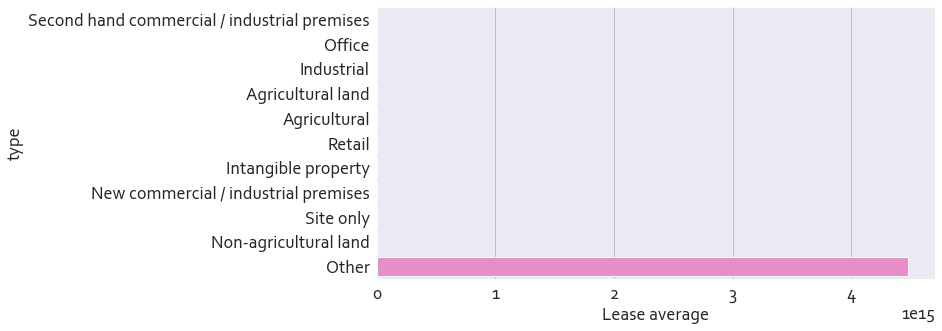

In [50]:
#visualizing
sns.barplot(y= hist['type'], x=hist['Lease average'])
#plt.xticks(rotation=90)

This plots  indicates Other as outlier in terms of Lease amount

<AxesSubplot:xlabel='count', ylabel='type'>

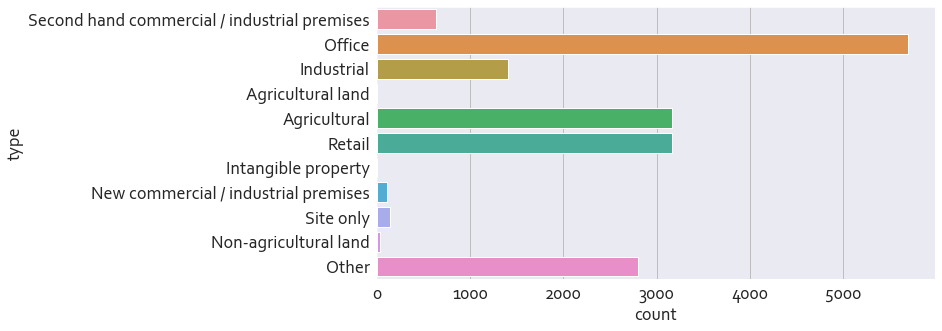

In [51]:
#countplot
sns.barplot(y= hist['type'], x=hist['count'])
#plt.xticks(rotation=90)

##### Binomial distribution:  how many 'Other' type of Lease in next 5 year? (2020 - 2025)

In [52]:
from scipy.stats import binom

count_other = hist.iloc[10]['count']
len_h = len(final_outliers)

p = count_other/len_h
n = len_h/2

#prob having exactly 1000 'other' type lease

binom.pmf(k = 1000, p= p, n=n)

4.29516646198588e-35

plotting binomial distribution 

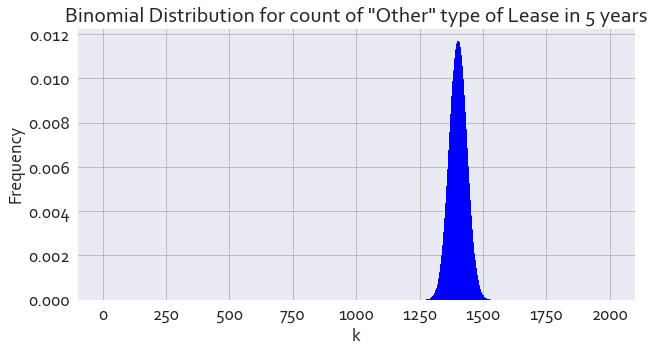

In [53]:
#Ideally we should show in range = n but that would plot a too small picture of the central limit of the distribution
r_values = list(range(2000))

# creating list of values
dist = [binom.pmf(r, n, p) for r in r_values ]

# edgecolor has to be changed or results wil be white color
plt.bar(r_values, dist,edgecolor='blue')
plt.title('Binomial Distribution for count of "Other" type of Lease in 5 years')
plt.ylabel('Frequency')
plt.xlabel('k')
plt.show()

Checking Outliers using boxplots

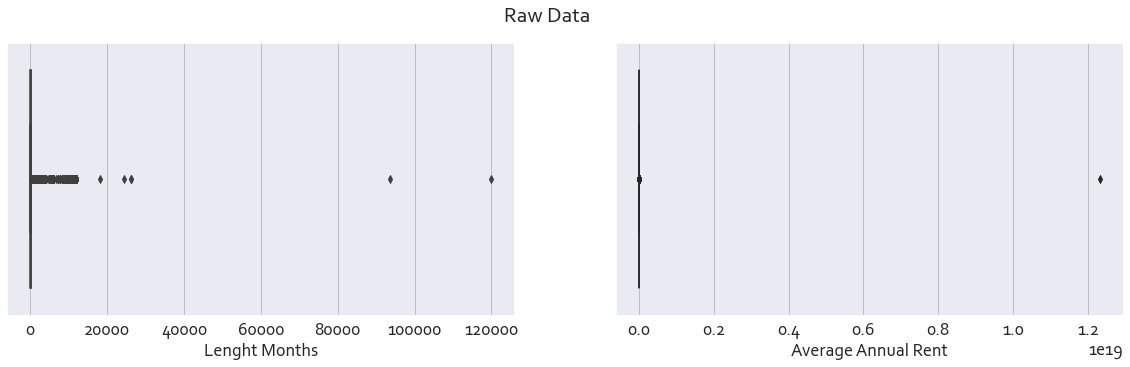

In [54]:
#boxplots

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.boxplot(x="Lenght Months", data=final_outliers, ax=axes[0])
sns.boxplot(x="Average Annual Rent", data=final_outliers, ax=axes[1],color='green')


fig.suptitle("Raw Data")

plt.show()

Clearly there are some extreme outliers which is why I'm going to apply the central limit theorem on lenghts and average annual rent

In [55]:
#creating 100 samples with n=50

samples_len = []
samples_rent = []

for x in range(101):
    a = final_outliers["Lenght Months"].sample(n=50)
    samples_len.append(a.mean())
    b = final_outliers["Average Annual Rent"].sample(n=50)
    samples_rent.append(b.mean())
    

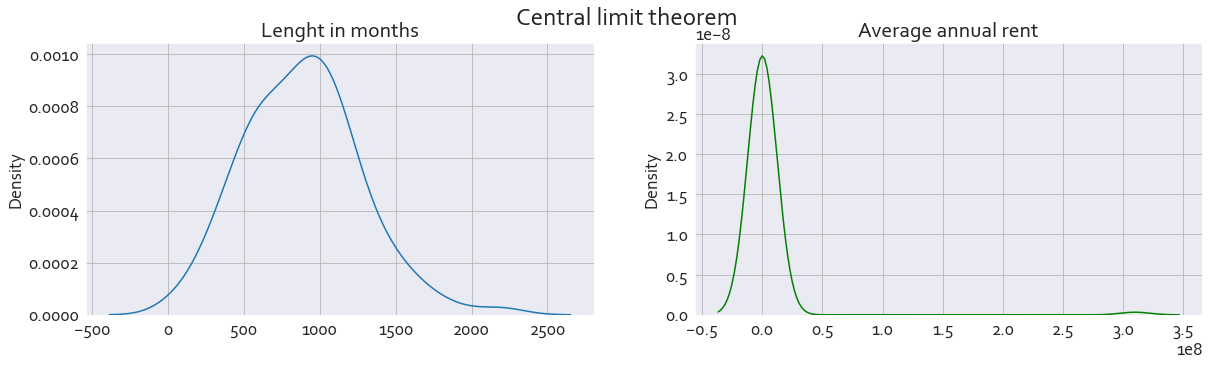

In [56]:
#plot distributions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1 = sns.distplot(samples_len,hist = False, kde = True, ax=axes[0])
ax2 = sns.distplot(samples_rent,hist = False, kde = True, ax=axes[1], color='green')
ax1.title.set_text('Lenght in months')
ax2.title.set_text('Average annual rent')
fig.suptitle("Central limit theorem", fontsize=25)

plt.show()

visualizing central limit theorem explanation

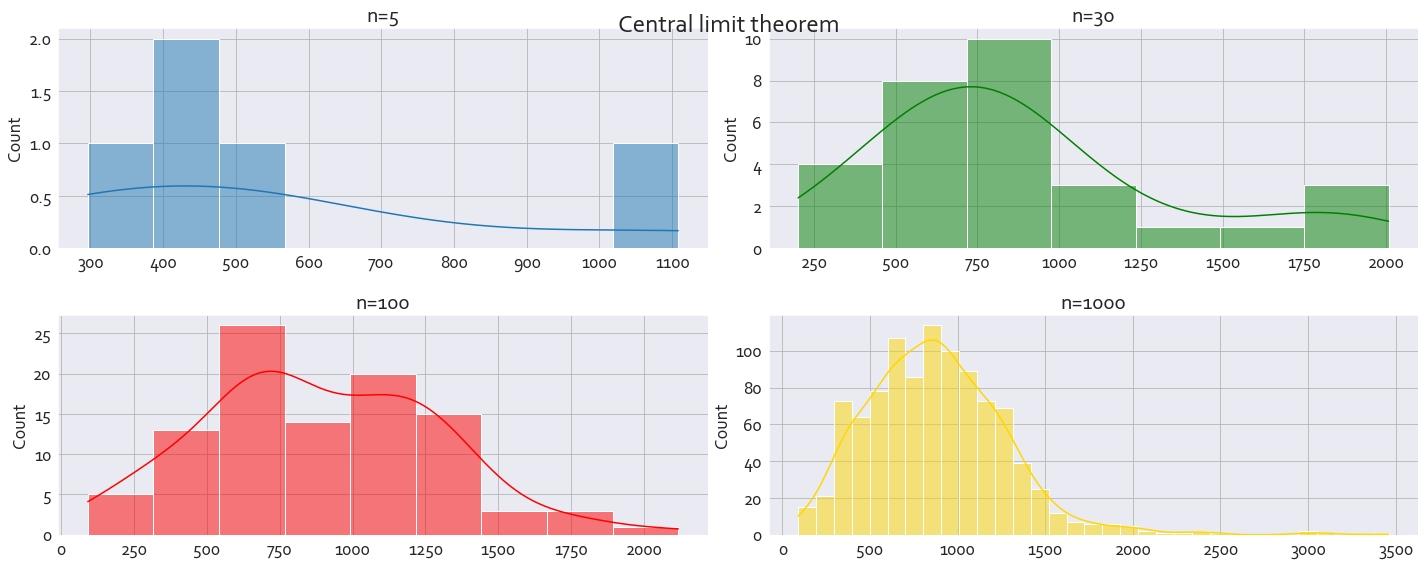

In [57]:
list_a = []
list_b = []
list_c = []
list_d = []

for x in range(5):
    a = final_outliers['Lenght Months'].sample(50).mean()
    list_a.append(a)
    
for x in range(30):
    b = final_outliers['Lenght Months'].sample(50).mean()
    list_b.append(b)
    
for x in range(100):
    c = final_outliers['Lenght Months'].sample(50).mean()
    list_c.append(c)

for x in range(1000):
    d = final_outliers['Lenght Months'].sample(50).mean()
    list_d.append(d)

# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.tight_layout(h_pad=2)

# plot data on each subplot
ax1 = sns.histplot(data=list_a, kde=True, ax=axes[0, 0])
ax1.title.set_text('n=5')
ax2 = sns.histplot(data=list_b, kde=True, ax=axes[0, 1], color='green')
ax2.title.set_text('n=30')
ax3 = sns.histplot(data=list_c, kde=True, ax=axes[1, 0], color='red')
ax3.title.set_text('n=100')
ax4 = sns.histplot(data=list_d, kde=True, ax=axes[1, 1], color='gold')
ax4.title.set_text('n=1000')

# set title for entire figure
fig.suptitle("Central limit theorem", fontsize=25)

# show the plot
plt.show()

#### Handling Outliers

checking for outliers for numeric attributes using the following formula (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR)

In [58]:
for x in ['Average Annual Rent','Lenght Months']:
    Q3 = final[x].quantile(0.75)
    Q1 = final[x].quantile(0.25)
    IQR = Q3-Q1
    
    print(x)
    print('upper bound')
    print(  Q3+1.5*IQR)
    print('lower bound')
    print(  Q1-1.5*IQR)
    print('\n-----------')

Average Annual Rent
upper bound
106600.0
lower bound
-55000.0

-----------
Lenght Months
upper bound
214.5
lower bound
-37.5

-----------


for lower bound we do not worry since we don't have negative values

In [59]:
#counting outliers

print( 'clr rent ' + str(len(final[final['Average Annual Rent']>106575.3125])) + '\n',
      'clr months ' + str(len(final[final['Lenght Months']>214.5])) + '\n', )

clr rent 1987
 clr months 2975



Due to the high number of outliers and lacking of critical information on why we would drop the outliers I decided to keep the outliers for machine learning and gaining insights, data without outliers will only be used for visualization

In [60]:
final = final[final['Average Annual Rent'] <= 106575 ]
final = final[final['Lenght Months'] <= 214.5]

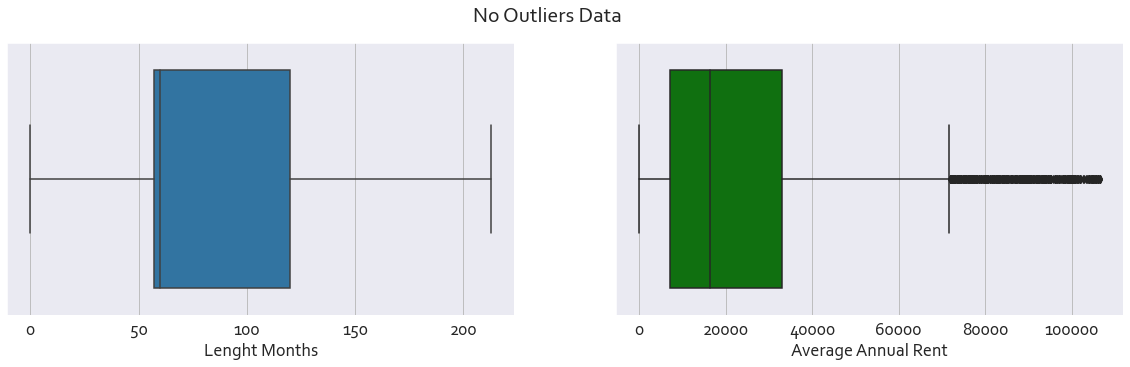

In [61]:
#same subplot of boxplots but without outliers

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.boxplot(x="Lenght Months", data=final, ax=axes[0])
sns.boxplot(x="Average Annual Rent", data=final, ax=axes[1],color='green')


fig.suptitle("No Outliers Data")

plt.show()

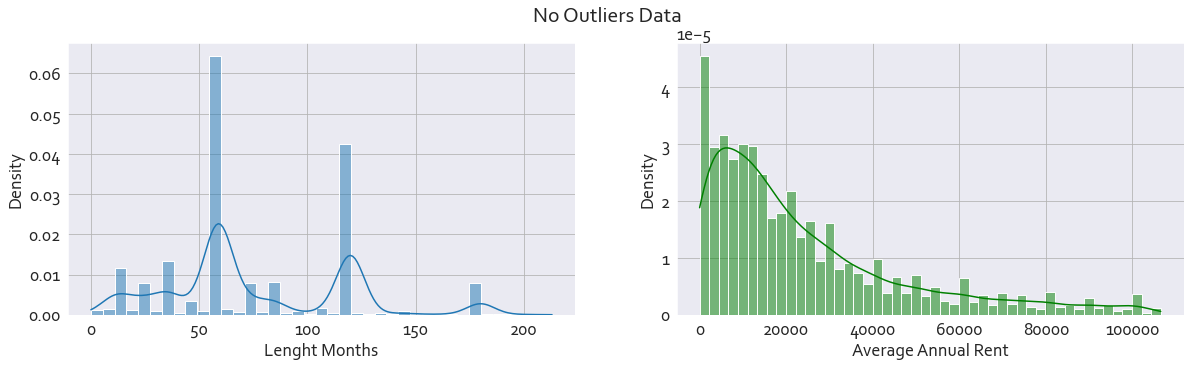

In [62]:
#distribution plots

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.histplot(x= final['Lenght Months'], kde=True, stat='density', ax=axes[0])
sns.histplot(x= final['Average Annual Rent'], kde=True, stat='density', ax=axes[1],color='green')

fig.suptitle("No Outliers Data")

plt.show()

<AxesSubplot:xlabel='Average Annual Rent', ylabel='Lenght Months'>

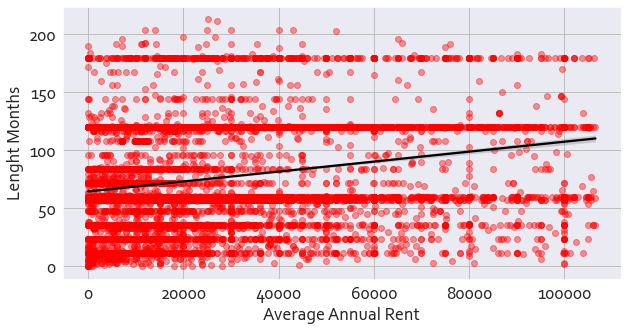

In [63]:
#plot for correlation between rent and lenght of lease
sns.regplot(data=final,x='Average Annual Rent',y='Lenght Months',
            color='red',scatter_kws={'alpha':0.4},line_kws={"color": "black"})

Text(0.5, 1.0, 'Rent Heatmap by county')

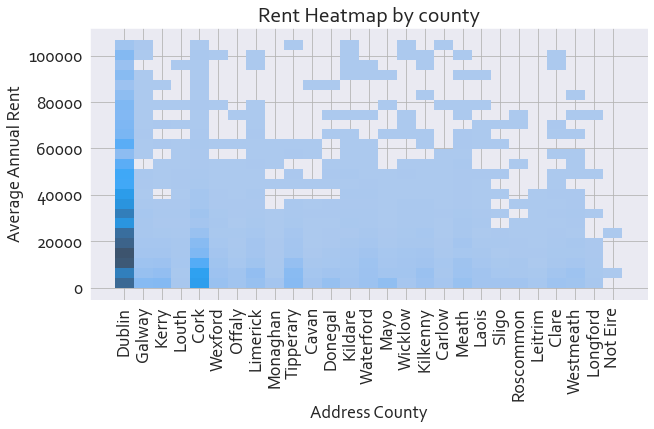

In [64]:
#renaming cause name too long for visuals
final['Address County'] = final['Address County'].replace({'Non-resident in Republic of Ireland': 'Not Eire'})

#seaborn histplot can display 2 variables as heatmap
ax = sns.histplot(data=final,x='Address County',y='Average Annual Rent',bins=25)
ax.tick_params(axis='x', rotation=90)
plt.title('Rent Heatmap by county')

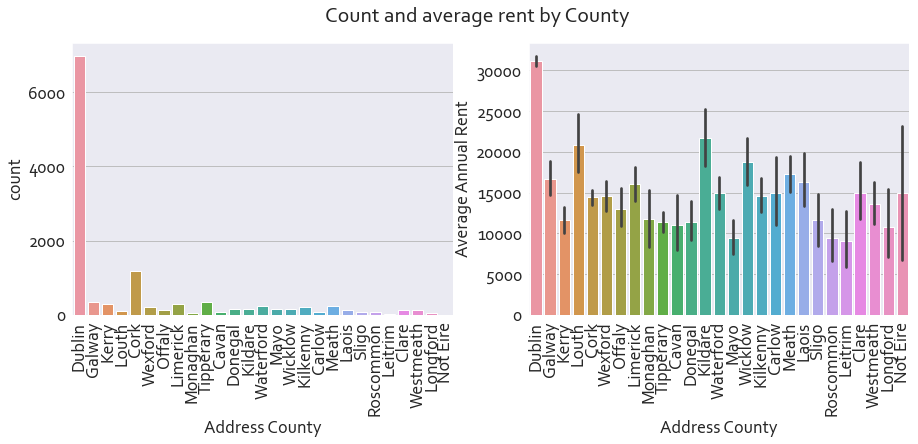

In [65]:
#count of Leases and average rent by county

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Count and average rent by County')

ax = sns.barplot(data=final,x='Address County',y='Average Annual Rent',ax=axes[1])
ax.tick_params(axis='x', rotation=90)
ay = sns.countplot(data=final,x='Address County',ax=axes[0])
ay.tick_params(axis='x', rotation=90)

plt.show()

In [66]:
#dropping attributes with only zeros
final = final[['Retail', 'Office', 'Other', 'Industrial',
 'Agricultural', 'Average Annual Rent',
       'Date of Lease (dd/mm/yyyy)', 'Lenght Months', 'Eircode',
       'Address County']]

# Machine learning

In [67]:
final_outliers.describe()

,Industrial,Second hand commercial / industrial premises,Office,Agricultural,Other,Intangible property,Retail,New commercial / industrial premises,Agricultural land,Non-agricultural land,Site only,Average Annual Rent,Lenght Months
count,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,16700.000000,1.655700e+04,16700.000000
mean,0.084491,0.037844,0.341018,0.189461,0.167665,0.000359,0.189521,0.006407,0.000299,0.001737,0.008503,7.447003e+14,878.426516
std,0.278131,0.190825,0.474066,0.391886,0.373579,0.018952,0.391934,0.079790,0.017301,0.041637,0.091822,9.582358e+16,2952.081652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.600000e+03,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+04,81.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000e+04,120.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.233000e+19,120000.000000


In [68]:
final_outliers.columns

Index(['Industrial', 'Second hand commercial / industrial premises', 'Office',
       'Agricultural', 'Other', 'Intangible property', 'Retail',
       'New commercial / industrial premises', 'Agricultural land',
       'Non-agricultural land', 'Site only', 'Average Annual Rent',
       'Date of Lease (dd/mm/yyyy)', 'Lenght Months', 'Eircode',
       'Address County'],
      dtype='object')

In [69]:
data = final_outliers[['Retail', 'Industrial', 'Agricultural', 'Agricultural land',
       'Non-agricultural land', 'Intangible property', 'Other',
       'Second hand commercial / industrial premises', 'Site only',
       'New commercial / industrial premises', 'Office', 'Average Annual Rent',
       'Lenght Months','Address County']]

scaling of continuos variables, dummy variables on county attribute

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data[['Average Annual Rent']] = sc.fit_transform(data[['Average Annual Rent']])
data[['Lenght Months']] = sc.fit_transform(data[['Lenght Months']])
address_dummies = pd.get_dummies(data['Address County'])
data = pd.concat([data, address_dummies], axis=1)

In [71]:
data = data[['Retail', 'Industrial', 'Agricultural', 'Other', 'Office',
       'Average Annual Rent', 'Lenght Months',  'Carlow',
       'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway', 'Kerry',
       'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick', 'Longford',
       'Louth', 'Mayo', 'Meath', 'Monaghan',
       'Non-resident in Republic of Ireland', 'Offaly', 'Roscommon', 'Sligo',
       'Tipperary', 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']]

In [72]:
nulltype(data)
data = data.dropna()

                                        type  null values %
Retail                                 int64       0.000000
Industrial                             int64       0.000000
Agricultural                           int64       0.000000
Other                                  int64       0.000000
Office                                 int64       0.000000
Average Annual Rent                  float64       0.008563
Lenght Months                        float64       0.000000
Carlow                                 uint8       0.000000
Cavan                                  uint8       0.000000
Clare                                  uint8       0.000000
Cork                                   uint8       0.000000
Donegal                                uint8       0.000000
Dublin                                 uint8       0.000000
Galway                                 uint8       0.000000
Kerry                                  uint8       0.000000
Kildare                                u

#### PCA

In [73]:
from sklearn.decomposition import PCA

#PCA
# Loop Function for scree plot

for comp in range(data.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(data)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp

        
Final_PCA = PCA(n_components= final_comp, random_state=42)
Final_PCA.fit(data)
PCA_data = Final_PCA.transform(data)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 33 components, we can explain 0.9999999999999999% of the variability in the original data.


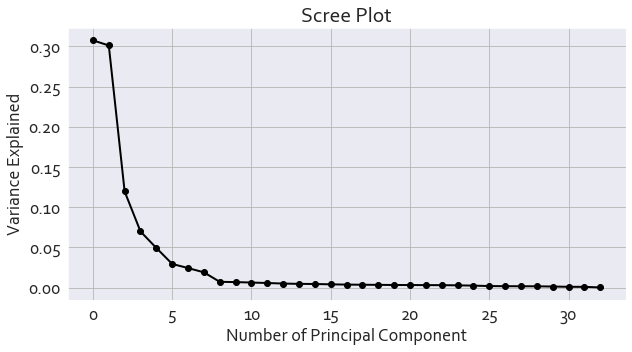

In [74]:
#visualizing scree plot

PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='black')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Component')
plt.ylabel('Variance Explained')
plt.show()

I decided to use PCA and keeping the number of components that explain at least 95% of the variance

In [75]:
for comp in range(data.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(data)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    
    if comp_check.sum() > 0.95:
        break
        
Final_PCA = PCA(n_components= final_comp, random_state=42)
Final_PCA.fit(data)
PCA_data = Final_PCA.transform(data)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 14 components, we can explain 0.9543959363274275% of the variability in the original data.


#### Clustering

On the reason for using DBSCAN please check report

https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31#:~:text=To%20determine%20the%20best%20epsilon,data%20points%20in%20your%20dataset.

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from itertools import product
from sklearn.metrics import silhouette_score

pca_eps_values = np.arange(0.5,1.5,0.1) 
pca_min_samples = np.arange(100,1000,200) 
pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []

for p in pca_dbscan_params:
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(PCA_data)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    pca_sil_score.append(silhouette_score(PCA_data, pca_dbscan_cluster.labels_))
    
pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])


In [ ]:
pca_eps_min_df

after selecting the right parameters, running the final cluster model, printing number of clusters and noise points

In [ ]:
db = DBSCAN(eps=.8, min_samples=300).fit(PCA_data)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(PCA_data, labels))

creating dataset for plotting 3D plot

In [ ]:
#only first 3 components for 3D plot
_3D = pd.DataFrame(PCA_data)
_3D = _3D[[0,1,2]]

In [ ]:
_3D

In [ ]:
#applying cluster labels to 3D dataset
labels = pd.DataFrame(labels)
labels = labels.rename(columns={0: 'cluster'})
_3D = pd.concat([_3D, labels], axis=1)
_3D = _3D.rename(columns={0: 'PC 1', 1: 'PC 2',2: 'PC 3'})
_3D.head()

In [ ]:
_3D.shape

### 3D cluster plot

In [ ]:
#removing noise points from visual 
_3D =_3D[_3D['cluster']>=0]

#3D plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(_3D['PC 1'],
           _3D['PC 2'], 
           _3D['PC 3'],  
           c = _3D['cluster'],s=300,
    cmap='viridis', alpha=0.7,linewidth=.7,edgecolors='white')
ax.set_xlabel('PC 1', fontsize=20,labelpad=10)
ax.set_ylabel('PC 2', fontsize=20,labelpad=10)
ax.set_zlabel('PC 3', fontsize=20,labelpad=10)

handles, labels = scatter.legend_elements(prop="colors", alpha=1)
legend = ax.legend(handles, labels, loc='best',fontsize = 17,shadow = True)
legend.set_title('cluster name',prop={'size':'large'})
ax.set_title('Cluster labels on first 3 components')
plt.show()

# classification

In [ ]:
data = final_outliers[['Retail', 'Industrial', 'Agricultural', 'Agricultural land',
       'Non-agricultural land', 'Intangible property', 'Other',
       'Second hand commercial / industrial premises', 'Site only',
       'New commercial / industrial premises', 'Office', 'Average Annual Rent',
       'Lenght Months','Address County']]
                      
data = data.dropna()

apply scaling and checking if imbalnace present, is so apply sampling techniques

In [ ]:
#again scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#defining target classes
data[['Average Annual Rent']] = sc.fit_transform(data[['Average Annual Rent']])
data[['Lenght Months']] = sc.fit_transform(data[['Lenght Months']])
data_1 = data[data['Address County']=='Dublin']
data_2 = data[data['Address County']!='Dublin']
data_2['Address County'] = 'Not Dublin'
data = pd.concat([data_1, data_2], axis=0)

In [ ]:
#checking for class imbalance
sns.countplot(x= data['Address County'])

data is not imbalanced, plotting heatmap for checking correlation in independent variables

In [ ]:
y = data[[ 'Address County']]
X = data[['Retail', 'Industrial', 'Agricultural', 'Agricultural land',
       'Non-agricultural land', 'Intangible property', 'Other',
       'Second hand commercial / industrial premises', 'Site only',
       'New commercial / industrial premises', 'Office', 'Average Annual Rent',
       'Lenght Months']]

In [ ]:
plt.figure(figsize=(20,20))
cor = X.corr()
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
for t in ax.texts:
    if float(t.get_text())>=0.4:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    elif float(t.get_text())<=-0.4:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text
plt.show()

### PCA

In [ ]:
# PCA
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(X.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(X)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.95:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(X)
cluster_df = Final_PCA.transform(X)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))


train test split

In [ ]:
from sklearn.model_selection import train_test_split
#split
X_train, X_test, y_train, y_test = train_test_split(cluster_df,y,test_size=0.30)

#not applying SMOTE cause we don't have a class imbalance problem
#from imblearn.over_sampling import SMOTE

#oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(X_train, y_train)

libraries for classification and metrics

In [ ]:
from sklearn.metrics import confusion_matrix as confucio
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

function to collect scores

In [ ]:
#Defining metric gathering function

_value = []
_model = []
_metric = []

def met(y_test,y_pred,x):
    _value.append(precision_score(y_test, y_pred, average='macro'))
    _model.append(x)
    _metric.append('Precision')  
    _value.append(recall_score(y_test, y_pred, average='macro'))
    _model.append(x)  
    _metric.append('Recall') 
    _value.append(accuracy_score(y_test, y_pred))
    _model.append(x)  
    _metric.append('Accuracy') 
    _value.append(f1_score(y_test, y_pred , average = 'macro'))
    _model.append(x)
    _metric.append('F1 Score') 

### Modelling

#### Knn

In [ ]:
#knn
x = 'Knn'

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


#Checking for k values
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot knn
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=6)
#train model with cross validation of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


#confusion matrix
y_pred= knn.predict(X_test)
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dublin', 'Not Dublin']); ax.yaxis.set_ticklabels(['Dublin', 'Not Dublin']);

#report
print ('\n clasification report:\n', classification_report(y_test,y_pred))

#apply metric function
met(y_test,y_pred,x)

### SVM

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#svm

start_time = time.time()
x = 'Svm'

model = Pipeline([('classification', SVC(random_state=1) )])

grid_params = {'classification__kernel': ['linear','poly', 'rbf', 'sigmoid'],
              'classification__C': [1,10]}

svm_clf = GridSearchCV(estimator=model, param_grid=grid_params, scoring='precision_weighted', cv=5,error_score='raise')

# fit the model
svm_clf.fit(X_train,y_train)

#best parameters,results from grid
svm_clf_best_parameters = svm_clf.best_params_
print("Optimal parameters:\n", svm_clf_best_parameters)
svm_clf_best_result = svm_clf.best_score_ 
print("Best mean cross-validated score:\n", svm_clf_best_result)

#metrics
y_pred= svm_clf.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dublin', 'Not Dublin']); ax.yaxis.set_ticklabels(['Dublin', 'Not Dublin']);
met(y_test,y_pred,x)

#checking time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

### Naive Bayes

In [ ]:
#Naive Bayes Gaussian
x = 'NB Gaussian'

from sklearn.naive_bayes import GaussianNB
nb_model = Pipeline([
        ('classification', GaussianNB() )])

nb_model.get_params().keys()
nb_clf = GridSearchCV(estimator=nb_model, param_grid={}, scoring='f1_micro', cv=10)
nb_clf.fit(X_train,y_train )


y_pred = nb_clf.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dublin', 'Not Dublin']); ax.yaxis.set_ticklabels(['Dublin', 'Not Dublin']);
print ('\n clasification report:\n', classification_report(y_test,y_pred))
met(y_test,y_pred,x)

In [ ]:
#Naive Bayes Bernoulli
x = 'NB Bernoulli'
from sklearn.naive_bayes import BernoulliNB
nb_model = Pipeline([
        ('classification', BernoulliNB() )])

nb_model.get_params().keys()
nb_clf = GridSearchCV(estimator=nb_model, param_grid={}, scoring='f1_micro', cv=10)
nb_clf.fit(X_train,y_train )


y_pred = nb_clf.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dublin', 'Not Dublin']); ax.yaxis.set_ticklabels(['Dublin', 'Not Dublin']);
print ('\n clasification report:\n', classification_report(y_test,y_pred))
met(y_test,y_pred,x)

### Decision Tree

In [ ]:
#decision tree
x = 'Decision Tree'
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    }
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, scoring = "accuracy")

grid_search.fit(X_train, y_train)
dt_best = grid_search.best_estimator_    
y_pred = dt_best.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dublin', 'Not Dublin']); ax.yaxis.set_ticklabels(['Dublin', 'Not Dublin']);
print ('\n clasification report:\n', classification_report(y_test,y_pred))
met(y_test,y_pred,x)

### RANDOM FOREST

In [ ]:
#random forest
x = 'Random F0rest'
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(random_state=42)

params = {
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [5, 10, 50],
    'criterion': ["gini", "entropy"],
    'n_estimators':[5,10,15],
    'min_samples_split':[2,4,6]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10,scoring = "accuracy")

grid_search.fit(X_train, y_train)

y_pred = dt_best.predict(X_test)
#confusion matrix
cm = confucio(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Dublin', 'Not Dublin']); ax.yaxis.set_ticklabels(['Dublin', 'Not Dublin']);
print ('\n clasification report:\n', classification_report(y_test,y_pred))
met(y_test,y_pred,x)

### PLOTTING METRICS

In [ ]:
metrics = {'Model': _model,
           'Metric': _metric ,
           'Score' : _value }
df = pd.DataFrame(metrics)

In [ ]:
ax = sns.barplot(data=df,x='Model',y='Score',hue='Metric')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize=14)

In [ ]:
end_time_1 = time.time()
elapsed_time = end_time_1 - start_time_1
print("Elapsed time: {:.2f} seconds".format(elapsed_time))